In [44]:
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
source = 'series_train.parquet'

df = pd.read_parquet(source)
display(df)

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0,0.021536,0.022214,-1.022370,0.022853,-88.280762,0.0,53.000000,4188.000000,56940000000000,4,3,41.0,00115b9f
1,1,0.022005,0.022187,-1.019740,0.020231,-88.241707,0.0,51.666668,4188.166504,56945000000000,4,3,41.0,00115b9f
2,2,0.022240,0.022005,-1.019401,0.019893,-88.170067,0.0,50.333332,4188.333496,56950000000000,4,3,41.0,00115b9f
3,3,0.021589,0.022578,-1.018177,0.018667,-88.250031,0.0,50.500000,4188.500000,56955000000000,4,3,41.0,00115b9f
4,4,0.022005,0.023763,-1.014323,0.016848,-88.130775,0.0,33.166668,4181.000000,57235000000000,4,3,41.0,00115b9f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314569144,398995,0.234029,-0.009520,0.993087,0.020346,76.694092,0.0,0.000000,3098.833252,52115000000000,3,1,324.0,ffed1dd5
314569145,398996,0.233796,-0.009803,0.993204,0.020409,76.693787,0.0,0.000000,3098.666748,52120000000000,3,1,324.0,ffed1dd5
314569146,398997,0.233900,-0.009610,0.993113,0.020342,76.693100,0.0,0.000000,3098.500000,52125000000000,3,1,324.0,ffed1dd5
314569147,398998,0.234016,-0.009584,0.992762,0.020028,76.693352,0.0,0.000000,3098.333252,52130000000000,3,1,324.0,ffed1dd5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314569149 entries, 0 to 314569148
Data columns (total 14 columns):
 #   Column               Dtype   
---  ------               -----   
 0   step                 uint32  
 1   X                    float32 
 2   Y                    float32 
 3   Z                    float32 
 4   enmo                 float32 
 5   anglez               float32 
 6   non-wear_flag        float32 
 7   light                float32 
 8   battery_voltage      float32 
 9   time_of_day          int64   
 10  weekday              int8    
 11  quarter              int8    
 12  relative_date_PCIAT  float32 
 13  id                   category
dtypes: category(1), float32(9), int64(1), int8(2), uint32(1)
memory usage: 15.2 GB


In [47]:
# There seems to be a lot of entries where the device was not on, but not so many in comparison to the overall number
# We can keep this entry and see if there's a correlation between these values and the SSI

print(df[df['non-wear_flag'] == 0].shape)
print(df[df['non-wear_flag'] == 1].shape)

print(df[df['non-wear_flag'].between(0, 1, inclusive='neither')].shape)

(226122397, 14)
(82524637, 14)
(5922115, 14)


In [48]:
# There are no null values in this dataset, which makes our work a bit easier

for col in df.columns:
    print(col, df[col].isna().sum())

step 0
X 0
Y 0
Z 0
enmo 0
anglez 0
non-wear_flag 0
light 0
battery_voltage 0
time_of_day 0
weekday 0
quarter 0
relative_date_PCIAT 0
id 0


In [49]:
# Convert nanoseconds to seconds and extract hours, minutes, seconds
df['seconds'] = df['time_of_day'].astype(int) / 1e9

# Convert the seconds to time of day using datetime.time
df['time_of_day'] = df['seconds'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(seconds=x)).time())

df = df.drop(columns=['step', 'X', 'Y', 'Z', 'anglez', 'battery_voltage', 'seconds'])

In [50]:
display(df)

,enmo,non-wear_flag,light,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0.022853,0.0,53.000000,15:49:00,4,3,41.0,00115b9f
1,0.020231,0.0,51.666668,15:49:05,4,3,41.0,00115b9f
2,0.019893,0.0,50.333332,15:49:10,4,3,41.0,00115b9f
3,0.018667,0.0,50.500000,15:49:15,4,3,41.0,00115b9f
4,0.016848,0.0,33.166668,15:53:55,4,3,41.0,00115b9f
...,...,...,...,...,...,...,...,...
314569144,0.020346,0.0,0.000000,14:28:35,3,1,324.0,ffed1dd5
314569145,0.020409,0.0,0.000000,14:28:40,3,1,324.0,ffed1dd5
314569146,0.020342,0.0,0.000000,14:28:45,3,1,324.0,ffed1dd5
314569147,0.020028,0.0,0.000000,14:28:50,3,1,324.0,ffed1dd5


In [51]:
result = df.groupby('id').agg({
    'enmo': ['mean', 'median'],
    'non-wear_flag': ['mean', 'median'],
    'light': ['mean', 'median']
})

result.columns = ['_'.join(col) for col in result.columns]
result.reset_index(inplace=True)

display(result)

/var/folders/md/j2f882mn1vl7cb0f7l2mmkjh0000gp/T/ipykernel_12445/3491830584.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('id').agg({


,id,enmo_mean,enmo_median,non-wear_flag_mean,non-wear_flag_median,light_mean,light_median
0,00115b9f,0.047388,0.023637,0.000000,0.0,42.296310,6.926828
1,001f3379,0.011926,0.009831,0.655708,1.0,16.771980,0.879005
2,00f332d1,0.030255,0.006382,0.171246,0.0,66.563393,7.172273
3,01085eb3,0.032946,0.008127,0.035210,0.0,17.800735,6.677332
4,012cadd8,0.058280,0.010466,0.000000,0.0,54.893402,7.059160
...,...,...,...,...,...,...,...
991,fe9c71d8,0.043686,0.022665,0.137257,0.0,7.297878,3.500000
992,fecc07d6,0.002962,0.001934,0.939101,1.0,50.648312,1.181806
993,ff18b749,0.053595,0.014763,0.000000,0.0,94.217117,4.000000
994,ffcd4dbd,0.028601,0.008805,0.020323,0.0,22.480034,5.282995


In [57]:
merge_table = pd.read_csv('train.csv')[['id', 'BIA-BIA_Activity_Level_num', 'SDS-SDS_Total_T', 'PCIAT-PCIAT_Total', 'sii']]

new_df = pd.merge(left=result, right=merge_table, how='left', on='id')

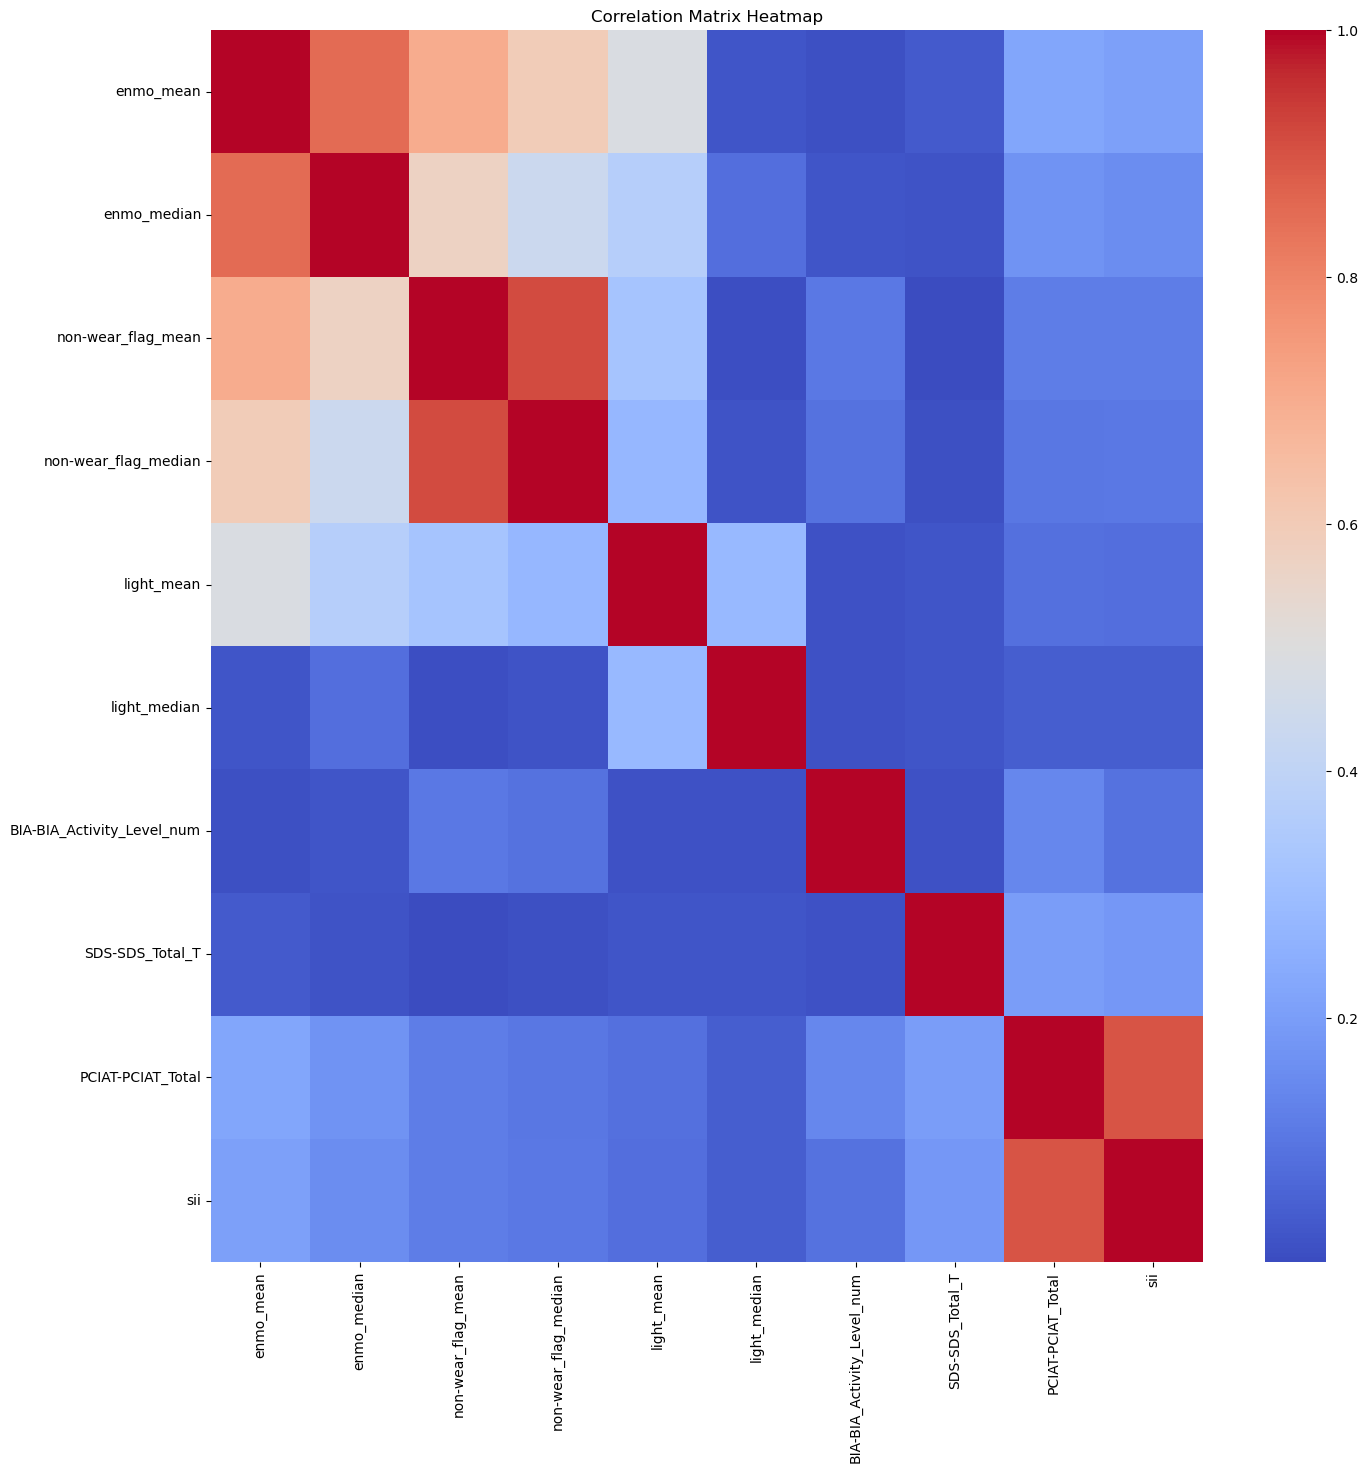

In [58]:
correlation_matrix = new_df.drop(columns=['id']).corr().abs()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [59]:
# It seems that the amount of movement has a correlation with the value of sii
# Also, the non-wear_flag has a high corelation with enmo,
# which makes sense and it might be unnecessary to have this column

new_df.corr()

ValueError: could not convert string to float: '00115b9f'

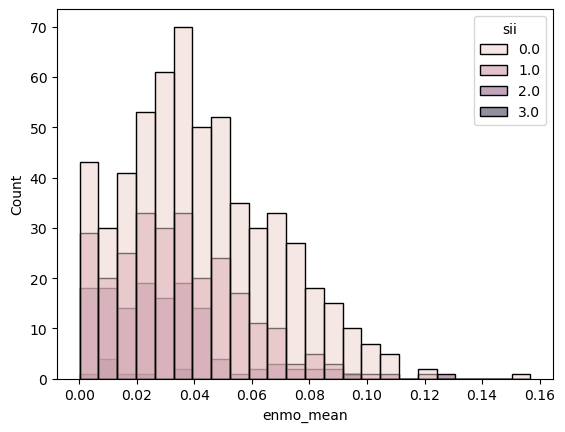

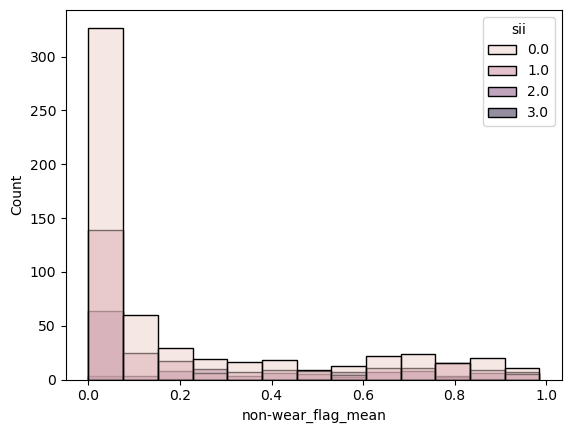

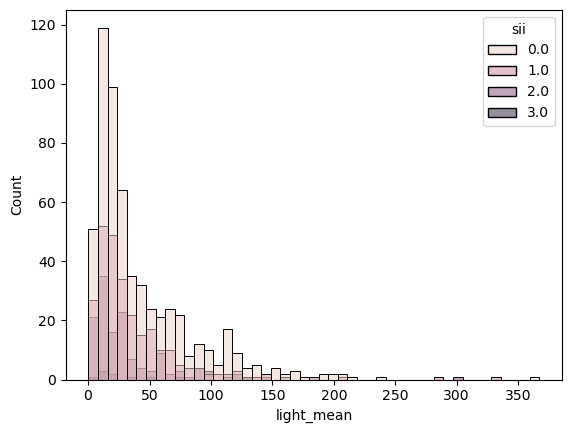

In [60]:
columns_to_display = ['enmo_mean', 'non-wear_flag_mean', 'light_mean']

for col in columns_to_display:
    sns.histplot(new_df, x=col, hue='sii')
    plt.show()

In [61]:
relevant_columns = ['enmo_mean', 'non-wear_flag_mean', 'light_mean']

X = new_df[relevant_columns]

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
pca_results = pca.fit_transform(data_scaled)

In [63]:
pca.explained_variance_ratio_

array([0.6750172], dtype=float32)

In [64]:
new_df['pca_1'] = pca_results[:, 0]

In [66]:
new_df.drop(columns='id').corr().abs()

,enmo_mean,enmo_median,non-wear_flag_mean,non-wear_flag_median,light_mean,light_median,BIA-BIA_Activity_Level_num,SDS-SDS_Total_T,PCIAT-PCIAT_Total,sii,pca_1
enmo_mean,1.000000,0.854668,0.701932,0.595290,0.485629,0.024358,0.010847,0.035706,0.223629,0.205348,0.908599
enmo_median,0.854668,1.000000,0.570361,0.436308,0.371648,0.080422,0.023182,0.019374,0.172526,0.155682,0.749269
non-wear_flag_mean,0.701932,0.570361,1.000000,0.912742,0.325307,0.009954,0.106387,0.002312,0.116704,0.116949,0.843779
non-wear_flag_median,0.595290,0.436308,0.912742,1.000000,0.277499,0.018094,0.090979,0.011766,0.102887,0.106370,0.743089
light_mean,0.485629,0.371648,0.325307,0.277499,1.000000,0.285997,0.016572,0.022788,0.085371,0.083179,0.698238
light_median,0.024358,0.080422,0.009954,0.018094,0.285997,1.000000,0.014051,0.025123,0.043764,0.041550,0.105393
BIA-BIA_Activity_Level_num,0.010847,0.023182,0.106387,0.090979,0.016572,0.014051,1.000000,0.014004,0.141052,0.089021,0.054552
SDS-SDS_Total_T,0.035706,0.019374,0.002312,0.011766,0.022788,0.025123,0.014004,1.000000,0.197681,0.182497,0.022842
PCIAT-PCIAT_Total,0.223629,0.172526,0.116704,0.102887,0.085371,0.043764,0.141052,0.197681,1.000000,0.894937,0.178401
sii,0.205348,0.155682,0.116949,0.106370,0.083179,0.041550,0.089021,0.182497,0.894937,1.000000,0.169545
